# <span style="color:black"> LSN-Esercitazione numerica 3</span>

## <span style="color:blue">  Esercizio 03.1</span>

Nell'esercitazione si è approfondita la pianificazione del prezzo di opzioni europee.
Ho simulato al tempo $t=0$ con metodi Monte Carlo l'**European call-option price** $C[S(0),0]$ e l'**European put-option price** $P[S(0),0]$:

* Call-option:
$$C\left[ S(t),t \right] = \left<e^{-rT}\left(S(T)-K\right)^+\right>$$
con 
$\bigl(S(T)-K\bigr)^+ := max\bigl[0, S(T)-K \bigr]$

* Put-option:

$$C\left[ P(t),t \right] = \left<e^{-rT}\left(K-S(T)\right)^+\right>$$

Ho campionato $ S\sim GBM(\mu,\sigma^2)$ a $t_1 < t_2 < … < t_n$ con:$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i \sim \mathcal{N}(0,1)$
    
Ho stimato il valore finale $S(T)$ sia direttamente sia in modo progressvo dividendo l'intervallo $[0,T]$ in 100 intervalli di tempo: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T=1)$

Ho confrontato i risultati con i valori analitici (soluzione analitica di Black-Scholes al tempo $t<T$):
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

Le incertezze sui valori sono studiate attraverso il Data-Blocking di $10^5$ valori suddivisi in 100 blocchi.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x, sum_prog, err_prog = np.loadtxt('Es03.1.1.res', usecols=(0,1,2), unpack='true')
x2, sum_prog2, err_prog2 = np.loadtxt('Es03.1.2.res', usecols=(0,1,2), unpack='true')
x3, sum_prog3, err_prog3 = np.loadtxt('Es03.1.3.res', usecols=(0,1,2), unpack='true')
x4, sum_prog4, err_prog4 = np.loadtxt('Es03.1.4.res', usecols=(0,1,2), unpack='true')

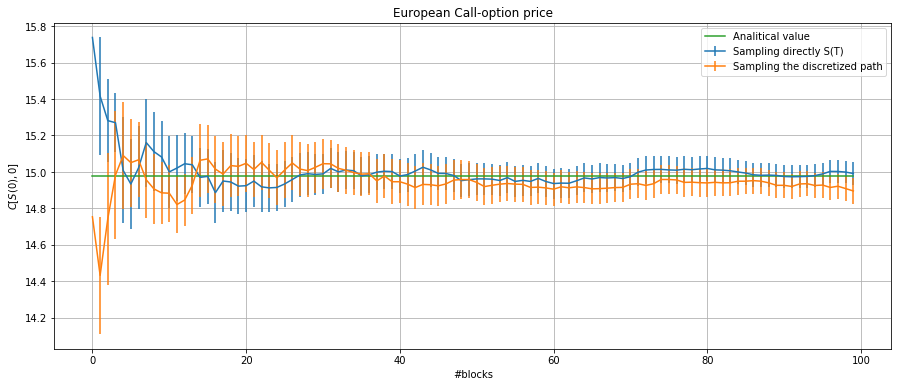

In [5]:
plt.figure(figsize=(15,6))
plt.errorbar(x,sum_prog,yerr=err_prog, label="Sampling directly S(T)")
plt.errorbar(x3,sum_prog3,yerr=err_prog3, label="Sampling the discretized path")
plt.plot(x-x+14.975790778311286, label="Analitical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$C[S(0),0]$')
plt.title("European Call-option price")
plt.grid(True)
plt.show()

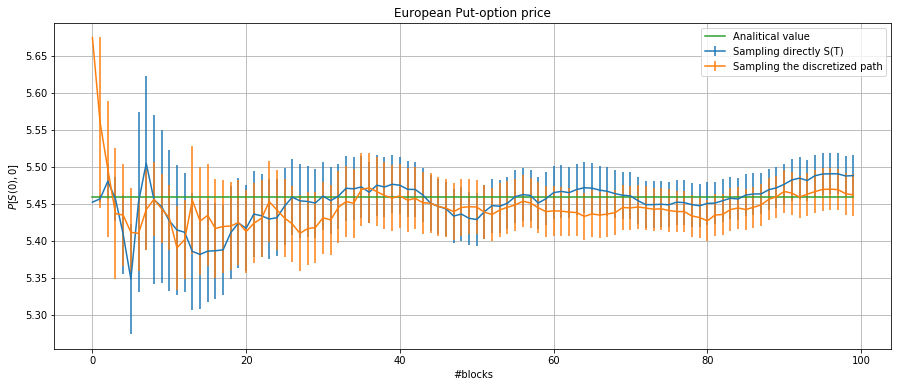

In [7]:
plt.figure(figsize=(15,6))
plt.errorbar(x2,sum_prog2,yerr=err_prog2, label="Sampling directly S(T)")
plt.errorbar(x4,sum_prog4,yerr=err_prog4, label="Sampling the discretized path")
plt.plot(x2-x2+5.4595325819072364, label="Analitical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$P[S(0),0]$')
plt.title("European Put-option price")
plt.grid(True)
plt.show()

Per entrambe le opzioni i due diversi metodi di campionamento portano a valori compatibili con i valori analitici.
Il campionamento del moto browniano geometrico suddiviso in 100 step o diretto ha portato a incertezze dello stesso ordine di grandezza.